In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('/content/sentiment_dataset.csv')

In [ ]:
data.shape

(10, 2)

In [ ]:
data.head()

,Sentence,Sentiment
0,I love the new design of the website.,positive
1,The product arrived late and was damaged.,negative
2,"The customer service was okay, not great but n...",neutral
3,This is the best purchase I've made this year!,positive
4,I'm not happy with the quality of the product.,negative


## **Splitting data**

In [ ]:
#method 1
X = data['Sentence']
y = data['Sentiment']

In [ ]:
print(data.columns)


Index(['Sentence', 'Sentiment'], dtype='object')


In [ ]:
#method 2
X = data.iloc[:,0]
y = data.iloc[:,1]

In [ ]:
X

0                I love the new design of the website.
1            The product arrived late and was damaged.
2    The customer service was okay, not great but n...
3       This is the best purchase I've made this year!
4       I'm not happy with the quality of the product.
5          The event was well-organized and enjoyable.
6          I have no strong feelings about this movie.
7        The software has many bugs and crashes often.
8             Excellent performance by the lead actor!
9               The meal was average, nothing special.
Name: Sentence, dtype: object

In [ ]:
y

0    positive
1    negative
2     neutral
3    positive
4    negative
5    positive
6     neutral
7    negative
8    positive
9     neutral
Name: Sentiment, dtype: object

## **Checking unique values in y**

In [ ]:
#method 1
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
#method 2
y.value_counts()

Sentiment
positive    4
negative    3
neutral     3
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

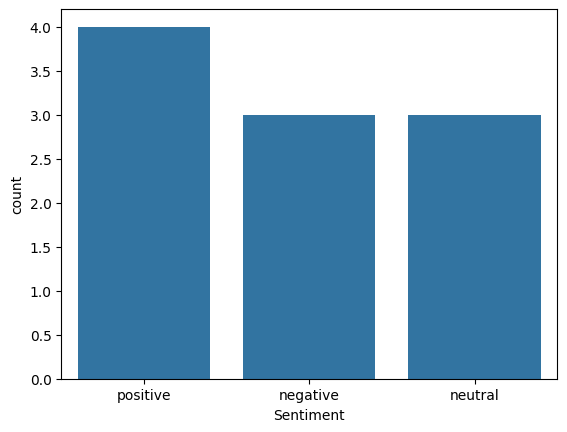

In [ ]:
#method 3
sns.countplot(x = y)

## **Preprocessing**

### **Handling  Null**

In [ ]:
y.isnull().sum()

0

### **Positive data**

In [ ]:
positive_data = data[data['Sentiment'] == 'positive'] # to extract the positive values alone

In [ ]:
positive_data

,Sentence,Sentiment
0,I love the new design of the website.,positive
3,This is the best purchase I've made this year!,positive
5,The event was well-organized and enjoyable.,positive
8,Excellent performance by the lead actor!,positive


In [ ]:
str(positive_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

"0             I love the new design of the website.\n3    This is the best purchase I've made this year!\n5       The event was well-organized and enjoyable.\n8          Excellent performance by the lead actor!\nName: Sentence, dtype: object"

(-0.5, 399.5, 199.5, -0.5)

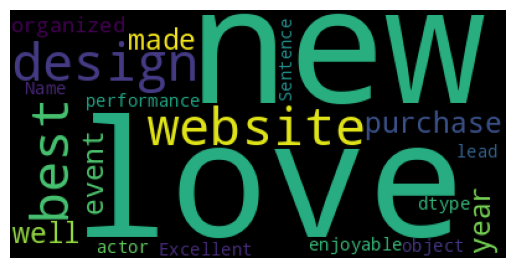

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(positive_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

### **Negative data**

In [ ]:
negative_data = data[data['Sentiment'] == 'negative'] # to extract the negative values alone

In [ ]:
positive_data

,Sentence,Sentiment
0,I love the new design of the website.,positive
3,This is the best purchase I've made this year!,positive
5,The event was well-organized and enjoyable.,positive
8,Excellent performance by the lead actor!,positive


In [ ]:
str(negative_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

"1         The product arrived late and was damaged.\n4    I'm not happy with the quality of the product.\n7     The software has many bugs and crashes often.\nName: Sentence, dtype: object"

(-0.5, 399.5, 199.5, -0.5)

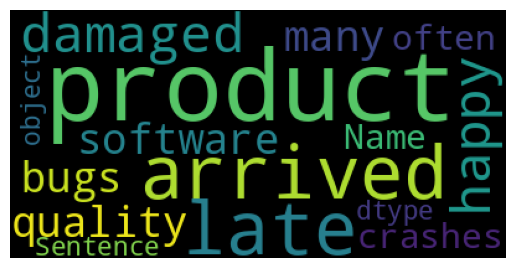

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(negative_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

### **Neutral data**

In [ ]:
neutral_data = data[data['Sentiment'] == 'neutral'] # to extract the neutral values alone

In [ ]:
neutral_data

,Sentence,Sentiment
2,"The customer service was okay, not great but n...",neutral
6,I have no strong feelings about this movie.,neutral
9,"The meal was average, nothing special.",neutral


In [ ]:
str(neutral_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

'2    The customer service was okay, not great but n...\n6          I have no strong feelings about this movie.\n9               The meal was average, nothing special.\nName: Sentence, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

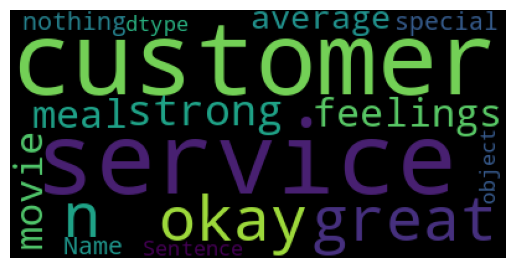

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(neutral_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

## **Vectorizer**

In [ ]:
vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(X)
X

<10x35 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0

In [ ]:
vec.vocabulary_

{'love': 17,
 'new': 20,
 'design': 8,
 'website': 33,
 'product': 24,
 'arrived': 1,
 'late': 15,
 'damaged': 7,
 'customer': 6,
 'service': 27,
 'okay': 21,
 'great': 13,
 'terrible': 31,
 'best': 3,
 'purchase': 25,
 've': 32,
 'year': 34,
 'happy': 14,
 'quality': 26,
 'event': 10,
 'organized': 22,
 'enjoyable': 9,
 'strong': 30,
 'feelings': 12,
 'movie': 19,
 'software': 28,
 'bugs': 4,
 'crashes': 5,
 'excellent': 11,
 'performance': 23,
 'lead': 16,
 'actor': 0,
 'meal': 18,
 'average': 2,
 'special': 29}

In [ ]:
len(vec.vocabulary_) # to get len of all vocabulary

35

In [ ]:
vec.vocabulary_['special'] # to get no of vocabulary of particalar word

29

## **Splitting**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## **Training model**

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
mnb.score(X_train,y_train)

1.0

In [ ]:
mnb.score(X_test,y_test)

0.0

In [ ]:
mnb.classes_ #the sequence of confussion matrix

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [ ]:
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[0, 2, 1],
       [0, 0, 0],
       [0, 0, 0]])

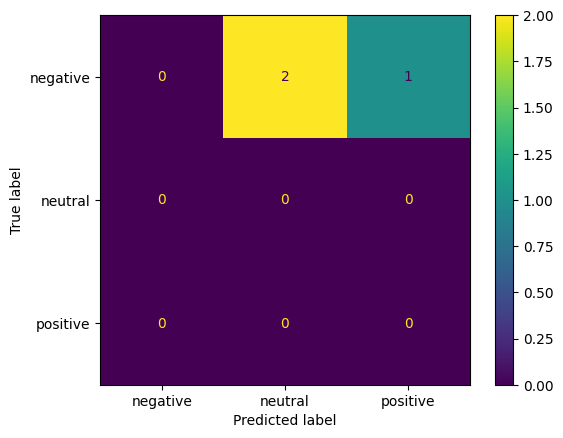

In [ ]:
ConfusionMatrixDisplay(cm, display_labels = mnb.classes_ ).plot()

In [ ]:
sample = 'The compant XYZ did not perform well in the first quater. Its sales have been declining.'
sample = vec.transform([sample])
mnb.predict(sample)

array(['negative'], dtype='<U8')

In [ ]:
sample1 = 'love'
sample1 = vec.transform([sample1])
mnb.predict(sample1)

array(['positive'], dtype='<U8')

### **This model can able to predict the positive sentiment and struggles to identify the negative data because has less datas with negative sentiment**